# Building your Deep Neural Network: Step by Step

Trong bài tập này, các bạn sẽ học cách từng bước cài đặt một Deep Neural Network.

**Sau bài tập này, các bạn có thể:**
- Sử dụng non-linear units như ReLU để cải thiện mô hình
- Xây dựng một deeper neural network (có nhiều hơn 1 hidden layer)
- Cài đặt một lớp neural network dễ sử dụng (có thể tùy chỉnh các siêu tham số)

**Notation**:
- Superscript $[l]$ chỉ những thứ gắn liền với $l^{th}$ layer. 
    - Ví dụ: $a^{[L]}$ là $L^{th}$ layer activation. $W^{[L]}$ và $b^{[L]}$ là những tham số của $L^{th}$ layer. ($L$ là layer cuối cùng)
- Superscript $(i)$ chỉ những thứ gắn liền với dữ liệu huấn luyện thứ $i^{th}$ trong tập huấn luyện. 
    - Ví dụ: $x^{(i)}$ là dữ liệu huấn luyện thứ $i^{th}$.
- Lowerscript $i$ chỉ phần tử thứ $i^{th}$ của một vector.
    - Ví dụ: $a^{[l]}_i$ chỉ phần thử thứ $i^{th}$ của vector cột activation $a^{[l]}$ (của $l^{th}$ layer).



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1 - Packages



In [ ]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
#from LlayerTestCases import *

!pip install LlayerTestCases
#from dnn_utils import sigmoid, sigmoid_backward, relu, relu_backward

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement LlayerTestCases (from versions: none)
ERROR: No matching distribution found for LlayerTestCases


## 2 - Giới thiệu tổng quát về Assignment

Trong bài tập này, Neural Network có L layer. Ở L-1 layer đầu tiên ta sẽ dùng ReLU activation function, ở output layer (chính là layer L) ta sẽ dùng sigmoid activation function.

Mô hình được mô tả qua hình dưới đây. Ở L-1 layer đầu tiên ta dùng ReLU activation function nên ở chiều forward ta có L-1 bước Linear ReLU forward và 1 bước Linear Sigmoid forward. Tương tự ở chiều backward ta có 1 bước Linear Sigmoid backward và L-1 bước Linear ReLU backward. 


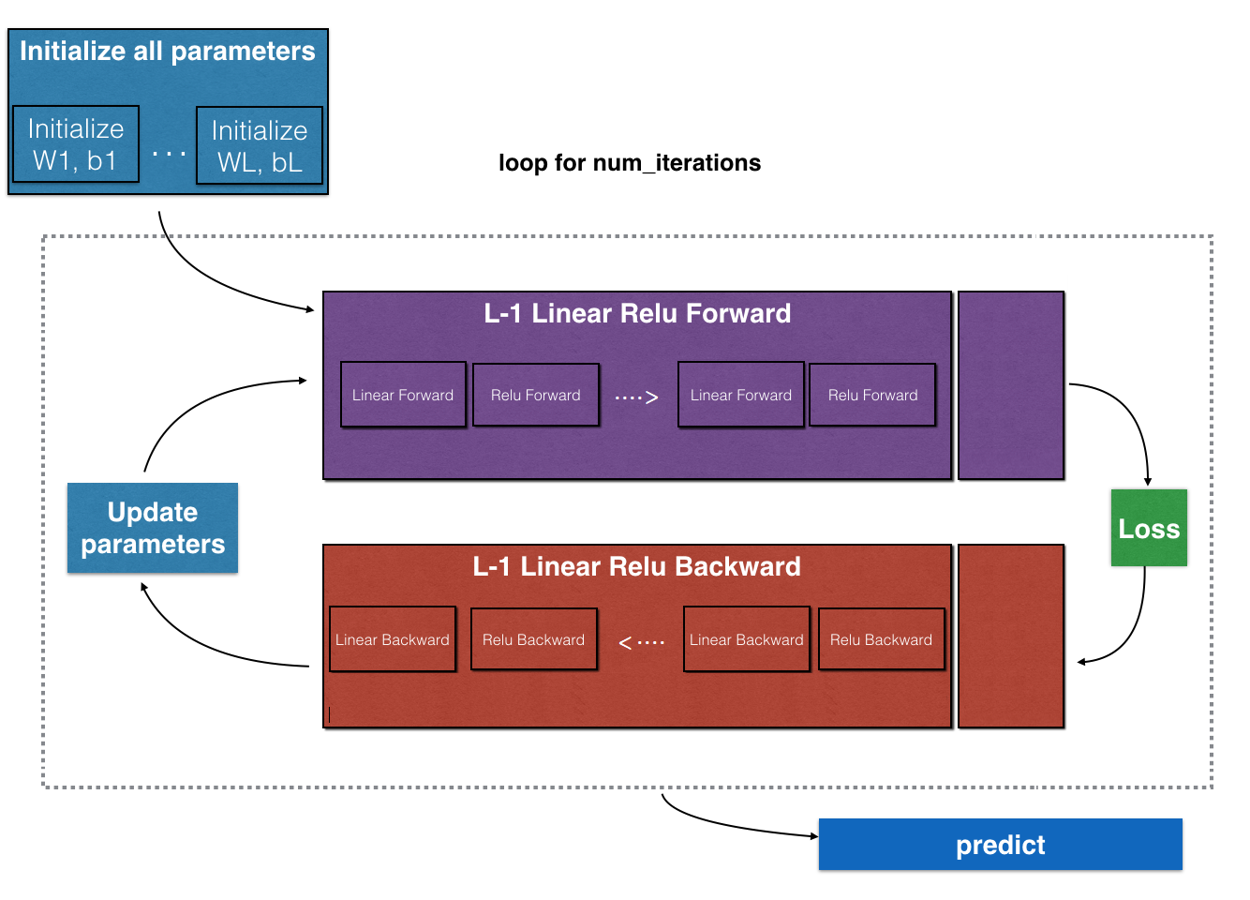

Chú ý ở mỗi bước forward (khung màu vàng trong hình trên) ta có 2 bước con là Linear forward và Activation forward. Tương tự ở mỗi bước backward (khung màu vàng trong hình trên) ta cũng có 2 bước con là Activation backward và Linear forward.

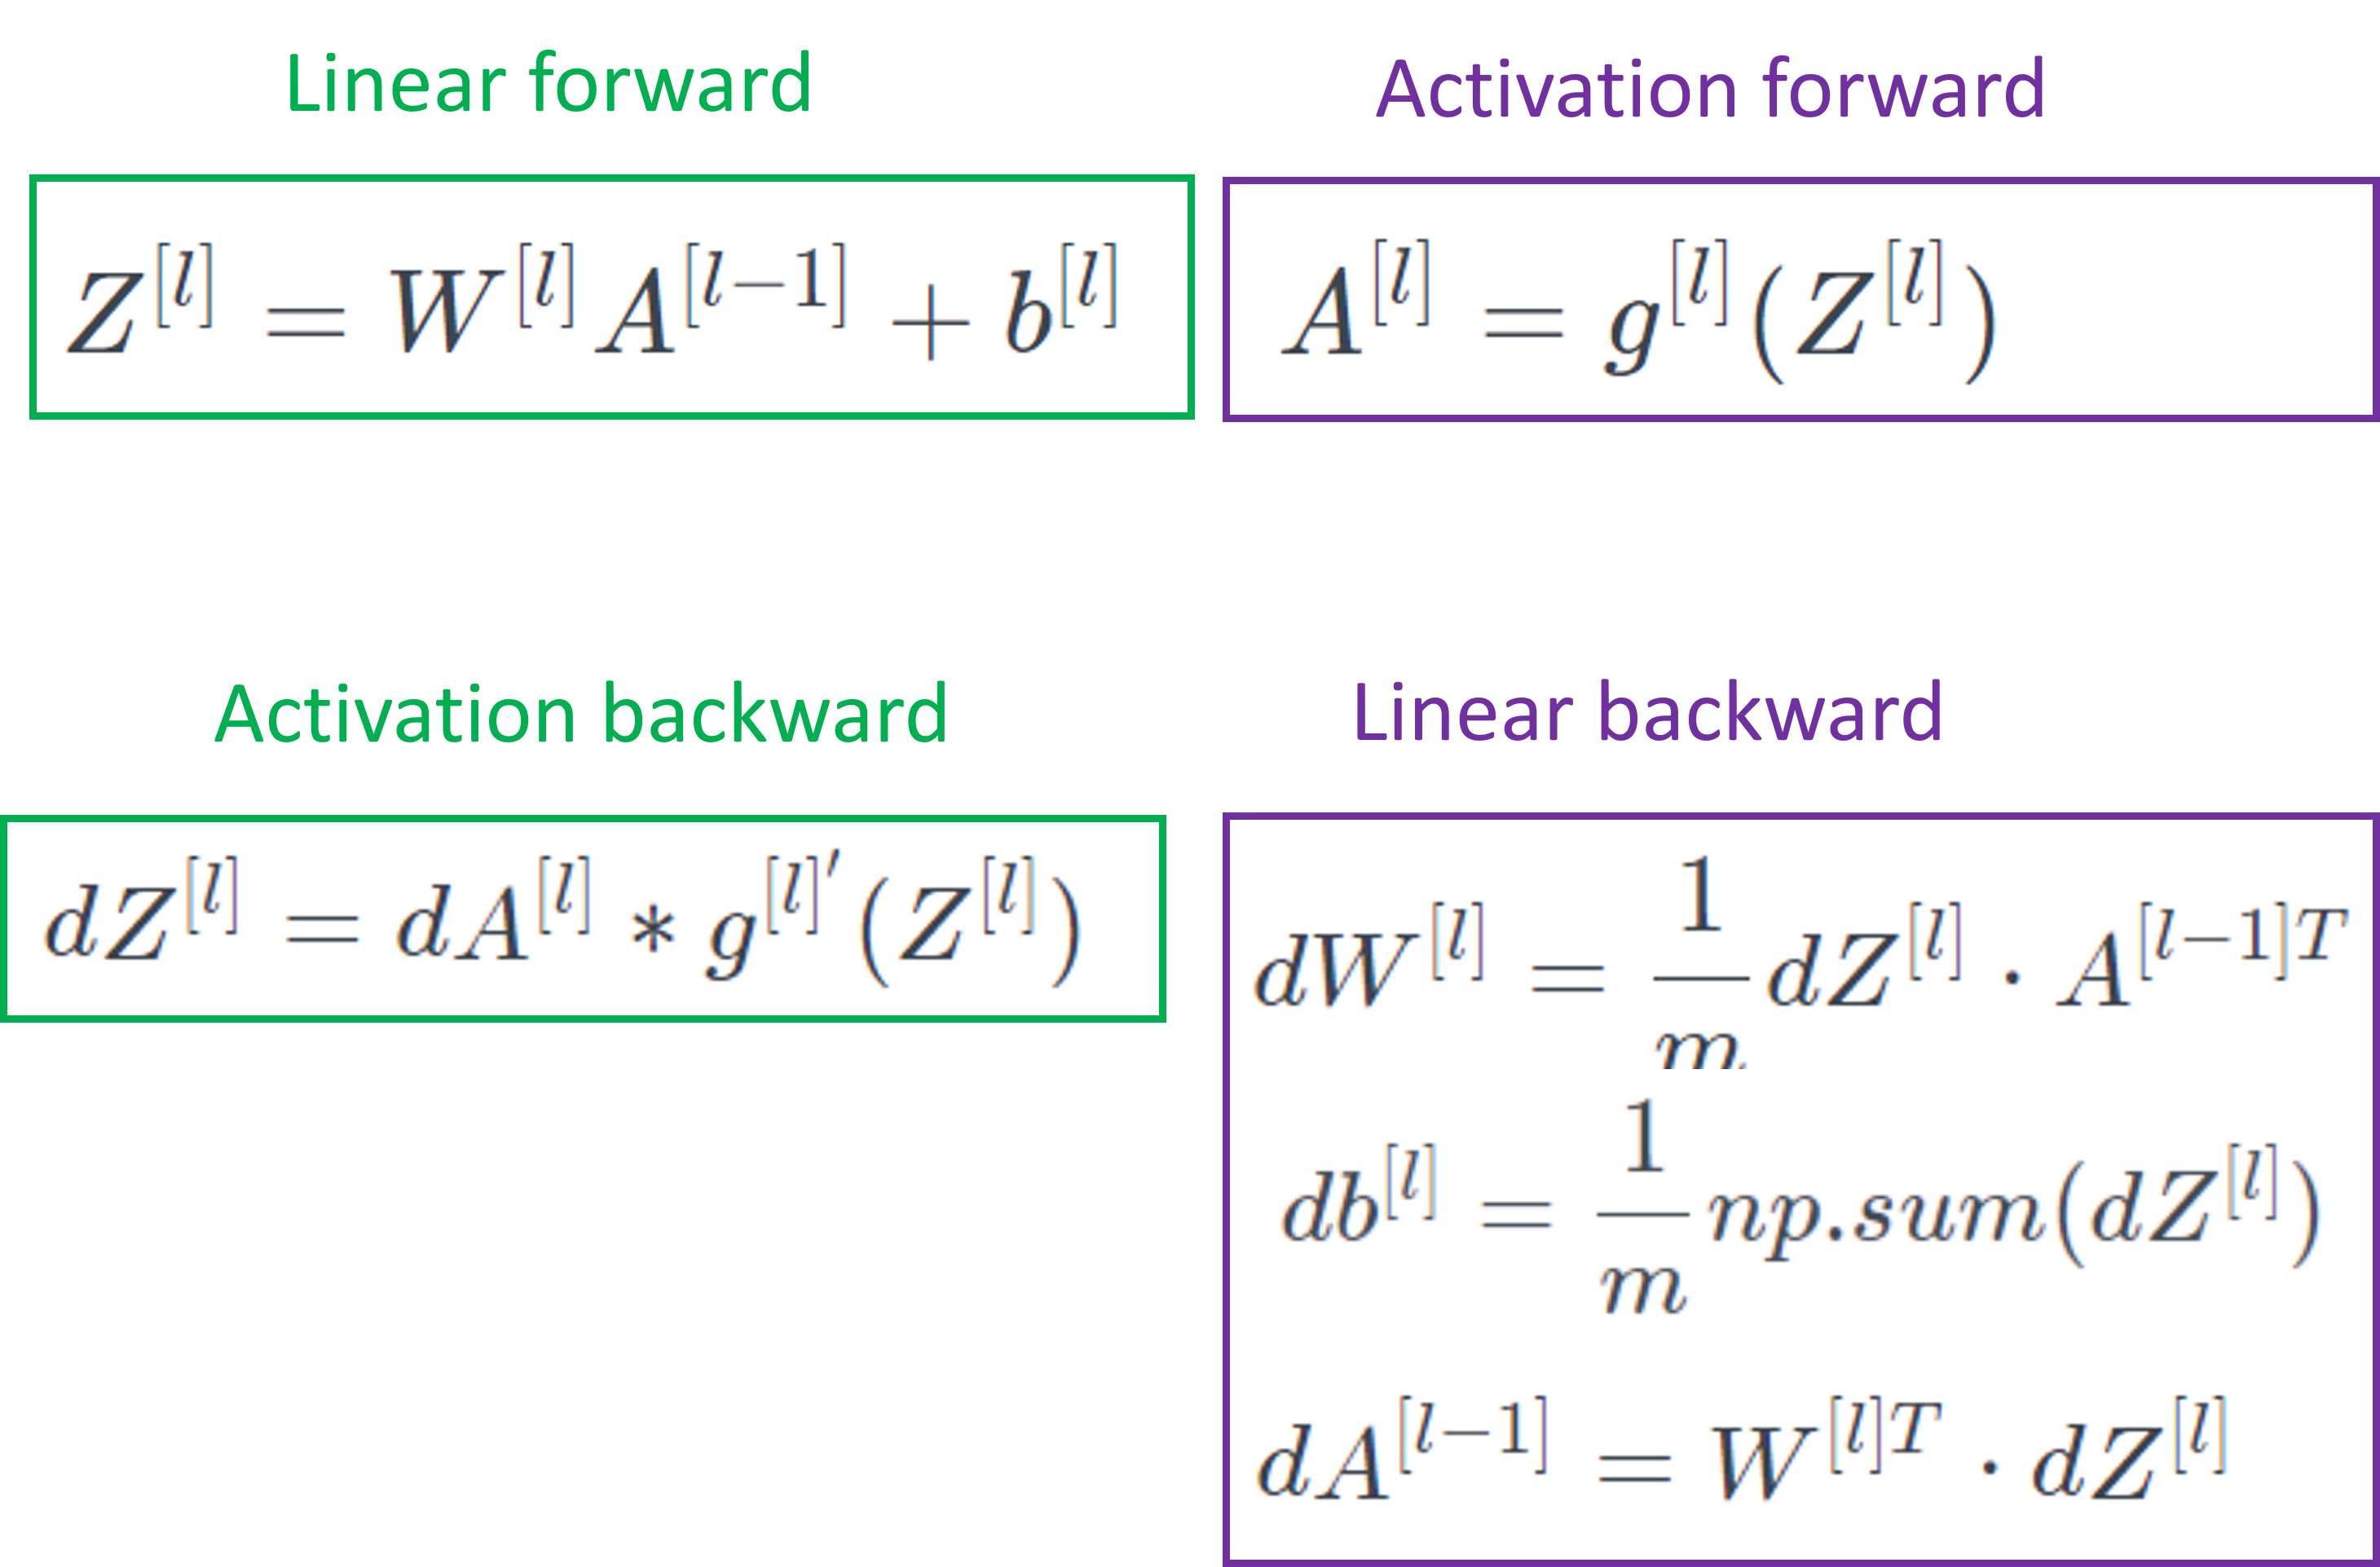


Để xây dựng mạng nơ-ron của mình, bạn sẽ thực hiện một số hàm "trợ giúp". Các hàm trợ giúp này sẽ được sử dụng để xây dựng mạng nơ ron hai lớp và mạng nơ ron L lớp. Các bạn sẽ:

- Khởi tạo tham số cho neural network
- Cài đặt forward propagation module 
- Compute the loss.
- Cài đặt backward propagation module
- Update the parameters.

Với mỗi forward function sẽ có một backward function tương ứng (có nghĩa là 2 hàm này sẽ cần dùng chung một số biến). Do đó tại mỗi bước của hàm forward, các bạn cần chứa các biến này vào một cache và sau đó trích xuất giá trị các biến này từ cache để tính gradient trong hàm backward.

## 3 - Initialization

Hàm trợ giúp đầu tiên là hàm khởi tạo tham số.



Ta cần khởi tạo tham số W và b cho L layer. Hãy chú ý kích thước (dòng,cột) của các ma trận tham số phải khớp giữa các layer.

Nhắc lại rằng $n^{[l]}$ là số unit ở layer thứ $l$. Kích thước ma trận $W^{[l]}$ của layer $l$ có $n^{[l]}$ dòng và $n^{[l-1]}$ cột. Bias b là một vector cột có $n^{[l]}$ dòng và 1 cột.

Trong trường hợp bạn cảm thấy lẫn lộn về số chiều, hãy nhìn lại cách tính $Z$:

$$Z^{[l]}=W^{[l]}A^{[l-1]}+b^{[l]}$$

Do việc nhân ma trận được thực hiện theo kiểu dòng nhân cột (tức là nhân các phần tử của mỗi dòng của ma trân $W^{[l]}$ với các phần tử của vector cột $A^{[l-1]}$), nên số phần tử của mỗi dòng của $W^{[l]}$ phải bằng số phần tử của vector cột $A^{[l-1]}$. số phần tử của mỗi dòng của $W^{[l]}$ chính là số cột của $W^{[l]}$. Do $A^{[l-1]}$ là vector cột chứa output của layer $[l-1]$ nên số phần tử của $A^{[l-1]}$ chính là số unit của layer này, tức là $n^{[l-1]}$. Do đó $W^{[l]}$ sẽ có $n^{[l-1]}$ cột.

Ví dụ nếu kích thước của dữ liệu đầu vào $X$ là $(12288, 209)$ ( tức là có $m=209$ mẫu huấn luyện), ta có:

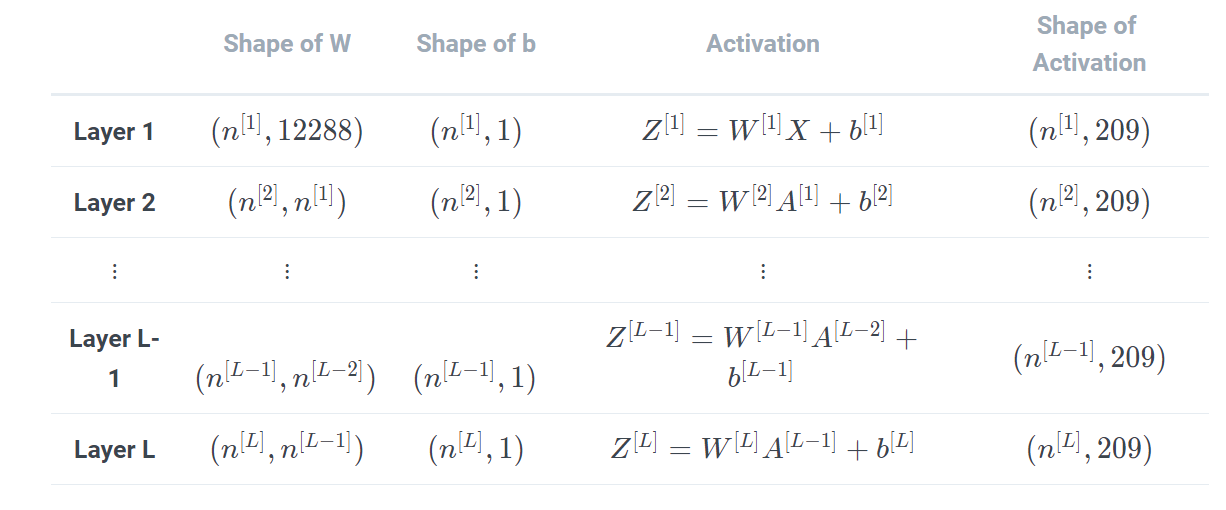





Bài tập 1:

Khởi tạo tham số cho L-layer Neural Network. 

Chỉ dẫn:
Đầu vào của hàm là một array chứa kích thước của từng layer trong network.
Đầu ra sẽ là một dictionary chứa các tham số W1,W2,...,WL và b1,b2,...,bL.

Tại layer $l$:
```python

        parameters["W" + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * 0.01
        parameters["b" + str(l)] = np.zeros((layer_dims[l], 1))
```

In [ ]:
# FUNCTION: initialize_parameters_deep

def initialize_parameters_deep(layer_dims):
    """
    Arguments:
    layer_dims -- python array (list) chứa kích thước từng layer
    
    Returns:
    parameters -- python dictionary chứa các tham số "W1", "b1", ..., "WL", "bL":
    """
    
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims)            # number of layers in the network

    for l in range(1, L):
        ### START CODE HERE ### 
        parameters['W' + str(l)] = 
        parameters['b' + str(l)] = 
        ### END CODE HERE ###
        
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))

        
    return parameters

In [ ]:
parameters = initialize_parameters_deep([5,4,3])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 0.01788628  0.0043651   0.00096497 -0.01863493 -0.00277388]
 [-0.00354759 -0.00082741 -0.00627001 -0.00043818 -0.00477218]
 [-0.01313865  0.00884622  0.00881318  0.01709573  0.00050034]
 [-0.00404677 -0.0054536  -0.01546477  0.00982367 -0.01101068]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.01185047 -0.0020565   0.01486148  0.00236716]
 [-0.01023785 -0.00712993  0.00625245 -0.00160513]
 [-0.00768836 -0.00230031  0.00745056  0.01976111]]
b2 = [[0.]
 [0.]
 [0.]]


**Expected output**:
       
<table style="width:80%">
  <tr>
    <td> **W1** </td>
    <td>[[ 0.01788628  0.0043651   0.00096497 -0.01863493 -0.00277388]
 [-0.00354759 -0.00082741 -0.00627001 -0.00043818 -0.00477218]
 [-0.01313865  0.00884622  0.00881318  0.01709573  0.00050034]
 [-0.00404677 -0.0054536  -0.01546477  0.00982367 -0.01101068]]</td> 
  </tr>
  
  <tr>
    <td>**b1** </td>
    <td>
        <table>
            <tr>
              <td>
                [[ 0.]
              </td>
            </tr>
            <tr>
              <td>
                [ 0.]
              </td>
            </tr>
            <tr>
              <td>
                [ 0.]
              </td>
            </tr>
            <tr>
              <td>
                [ 0.]]
              </td>
            </tr>
        </table>
    <td>    
        
  </tr>
  
  <tr>
    <td>**W2** </td>
    <td>[[-0.01185047 -0.0020565   0.01486148  0.00236716]
 [-0.01023785 -0.00712993  0.00625245 -0.00160513]
 [-0.00768836 -0.00230031  0.00745056  0.01976111]]</td> 
  </tr>
  
  <tr>
    <td>**b2** </td>
    <td>
        <table>
            <tr>
              <td>
                [[ 0.]
              </td>
            </tr>
            <tr>
              <td>
                [ 0.]
              </td>
            </tr>
            <tr>
              <td>
                [ 0.]]
              </td>
            </tr>
        </table>
    </td> 
  </tr>
  
</table>

## 4 - Forward propagation module

### 4.1 - Cài đặt activation function

In [ ]:
def sigmoid(Z):

    A = 1/(1+np.exp(-Z))

    return A

def relu(Z):

    A = np.maximum(0,Z)

    assert(A.shape == Z.shape)
    
    return A


### 4.2 - Linear-Activation Forward

Bài tập 2: cài đặt linear-activation forward 

Như đã nói ở mục 2, mỗi bước Linear-Activation Foward gồm 2 bước gồm:

- Linear forward:      tính $Z^{[l]}=W^{[l]}A^{[l-1]}+b$
- Activation forward: tính $A^{[l]}=g(Z^{[l]})$ trong đó $g$ là activation function (Sigmoid hoặc ReLU)

**Quan trọng:** Hãy chú ý cách lưu lại các giá trị A, W, b, Z:

- Các giá trị A_prev, W, b dùng ở bước linear forward sẽ được lưu trong linear_cache. Ta sẽ dùng các giá trị này trong bước linear forward.
- Giá trị Z dùng ở bước activation forward sẽ được lưu trong activation_cache. Ta sẽ dùng các giá trị này trong bước activation forward.

In [ ]:
# GRADED FUNCTION: linear_activation_forward

def linear_activation_forward(A_prev, W, b, activation):
    """
    Cài đặt hàm forward propagation cho một layer

    Arguments:
    A_prev -- output của layer trước, kích thước (size of previous layer, number of examples)
    W -- ma trận W của layer hiện tại, kích thước (size of current layer, size of previous layer)
    b -- vector cột b của layer hiện tại, kích thước (size of the current layer, 1)
    activation -- loại activation function dùng cho layer hiện tại, là một chuỗi có giá trị "sigmoid" hoặc "relu"

    Returns:
    A -- output của layer hiện tại
    cache -- python dictionary chứa "linear_cache" and "activation_cache" sẽ được dùng ở bước linear backward và activation backward
    """
    
    # cài đặt linear forward
    ### START CODE HERE ### (≈ 1 line of code)
    Z = 
    ### END CODE HERE ###
    assert(Z.shape == (W.shape[0], A_prev.shape[1]))
    
    
    
    # cài đặt activation forward
    if activation == "sigmoid":
        ### START CODE HERE ### (≈ 1 lines of code)
        A  = 
        ### END CODE HERE ###
    
    elif activation == "relu":
        ### START CODE HERE ### (≈ 1 lines of code)
        A = 
        ### END CODE HERE ###
    
    
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    
    linear_cache = (A_prev, W, b) #sẽ được dùng ở bước linear backward cho layer hiện tại
    activation_cache = Z #sẽ được dùng ở bước activation backward cho layer hiện tại
    
    cache = (linear_cache, activation_cache) 
    
    return A, cache

In [ ]:
A_prev, W, b = linear_activation_forward_test_case()

A, linear_activation_cache = linear_activation_forward(A_prev, W, b, activation = "sigmoid")
print("With sigmoid: A = " + str(A))

A, linear_activation_cache = linear_activation_forward(A_prev, W, b, activation = "relu")
print("With ReLU: A = " + str(A))

With sigmoid: A = [[0.96890023 0.11013289]]
With ReLU: A = [[3.43896131 0.        ]]


**Expected output**:
       
<table style="width:35%">
  <tr>
    <td> **With sigmoid: A ** </td>
    <td > [[ 0.96890023  0.11013289]]</td> 
  </tr>
  <tr>
    <td> **With ReLU: A ** </td>
    <td > [[ 3.43896131  0.        ]]</td> 
  </tr>
</table>


### d) Forward propagation cho L layer

Bài tập 3: cài đặt forward propagation cho L layer

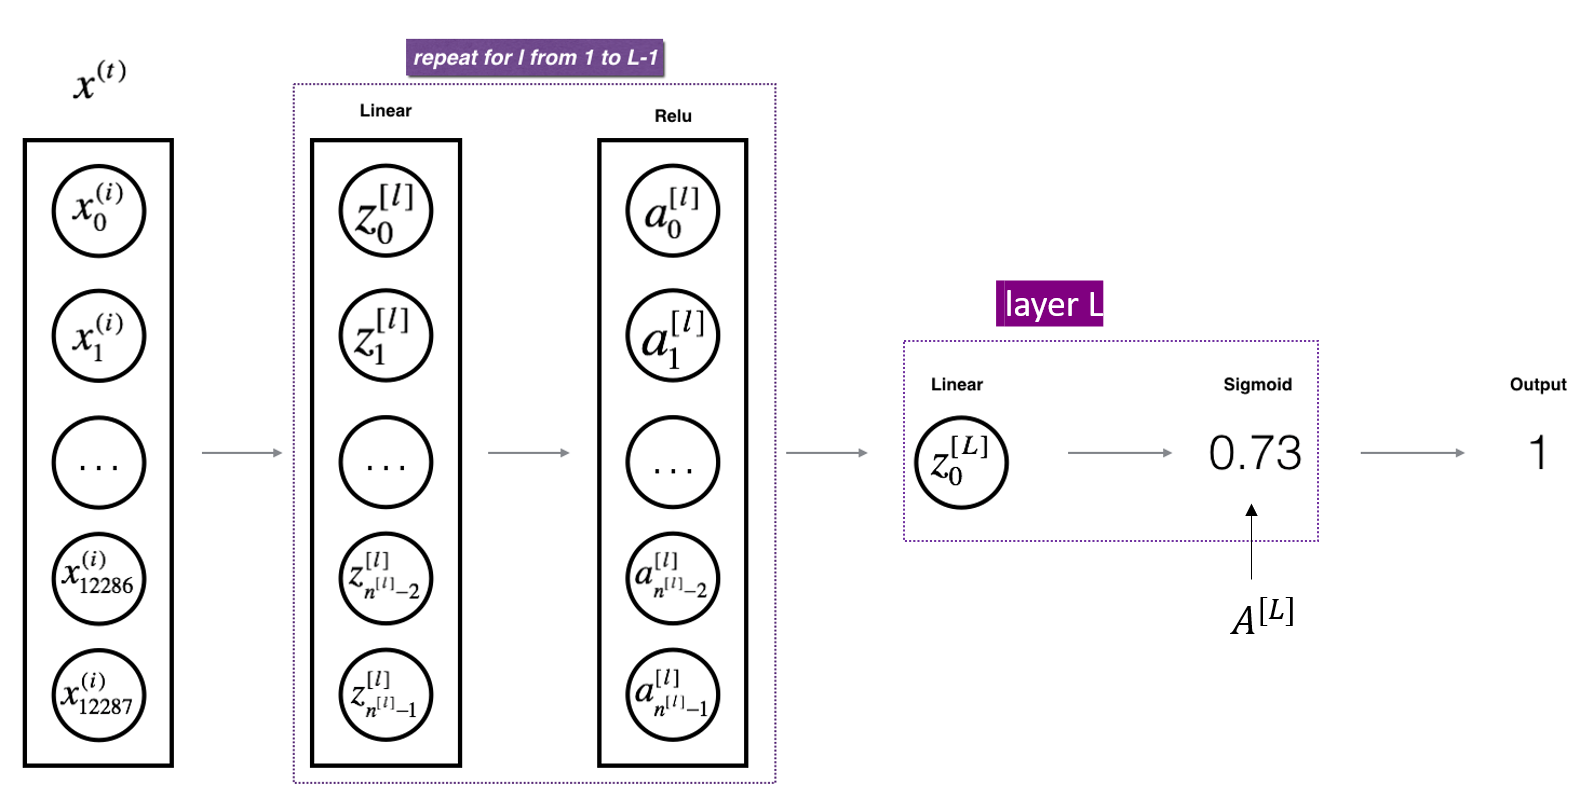


Hướng dẫn: 
- Từ layer 0 đến layer L-1 ta dùng hàm `linear_activation_forward` với loại activation là "relu". 
- Ở layer L ta dùng hàm `linear_activation_forward` với loại activation là "sigmoid".
- Hãy nhớ chèn cache ở layer hiện tại vào một "caches" list. 

In [ ]:
# GRADED FUNCTION: L_layer_forward

def L_layer_forward(X, parameters):
    """
    Forward propagation cho L layer
    
    Arguments:
    X -- dữ liệu đầu vào, là ma trận kích thước (input size, number of examples)
    parameters -- là output của hàm initialize_parameters_deep(), chứa các tham số W,b của tất cả L layer
    
    Returns:
    AL -- output của layer cuối cùng AL
    caches -- danh sách chứa:
                every cache of linear_relu_forward() (there are L-1 of them, indexed from 0 to L-2)
                the cache of linear_sigmoid_forward() (there is one, indexed L-1)
    """

    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network
    
    # Tại layer 0 đến layer L-1
    for l in range(1, L):
        A_prev = A 
   
        A, cache = linear_activation_forward(A_prev,parameters['W'+str(l)],parameters['b' + str(l)],"relu")
        caches.append(cache)
   
    
    # Tại layer L
    ### START CODE HERE ### 
    AL, cache = 
    caches.append(cache)
    ### END CODE HERE ###
    
    assert(AL.shape == (1,X.shape[1]))
            
    return AL, caches

In [ ]:
X, parameters = L_model_forward_test_case_2hidden()
AL, caches = L_layer_forward(X, parameters)
print("AL = " + str(AL))
print("Length of caches list = " + str(len(caches)))

AL = [[0.03921668 0.70498921 0.19734387 0.04728177]]
Length of caches list = 3


<table style="width:50%">
  <tr>
    <td> **AL** </td>
    <td > [[ 0.03921668  0.70498921  0.19734387  0.04728177]]</td> 
  </tr>
  <tr>
    <td> **Length of caches list ** </td>
    <td > 3 </td> 
  </tr>
</table>

## 5 - Cost function

Sau bước forward propagation cho L layer và thu được output $A^{[L]}$, ta có thể dùng output này để tính cost.

Hàm compute_cost sẽ tính giá trị cross-entropy cost $J$: $$-\frac{1}{m} \sum\limits_{i = 1}^{m} (y^{(i)}\log\left(a^{[L] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right)) \tag{7}$$

Do hàm này đã được cài đặt ở các assignment trước, lần này các bạn sẽ không phải cài đặt hàm này 😸😸😸.


In [ ]:
# FUNCTION: compute_cost

def compute_cost(AL, Y):
    """
    Tính giá trị cross-entropy cost

    Arguments:
    AL -- output của layer L (layer cuối cùng)
    Y -- nhãn đúng (ví dụ 0 if non-cat, 1 if cat), kích thước (1, số mẫu huấn luyện)

    Returns:
    cost -- cross-entropy cost
    """
    
    m = Y.shape[1]

    logprobs = np.multiply(np.log(AL), Y) + np.multiply((1 - Y), np.log(1 - AL))
    cost = -1/m*np.sum(logprobs)
    
    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    assert(cost.shape == ())
    
    return cost

In [ ]:
Y, AL = compute_cost_test_case()

print("cost = " + str(compute_cost(AL, Y)))

cost = 0.41493159961539694


**Expected Output**:

<table>

    <tr>
    <td>**cost** </td>
    <td> 0.41493159961539694</td> 
    </tr>
</table>

## 6 - Backward propagation module

Như đã nói ở mục 2, mỗi bước backward propagation gồm 2 bước:

- Activation backward: tính dZ
- Linear backwkakrd: tính dW, db, dA_pre từ dZ

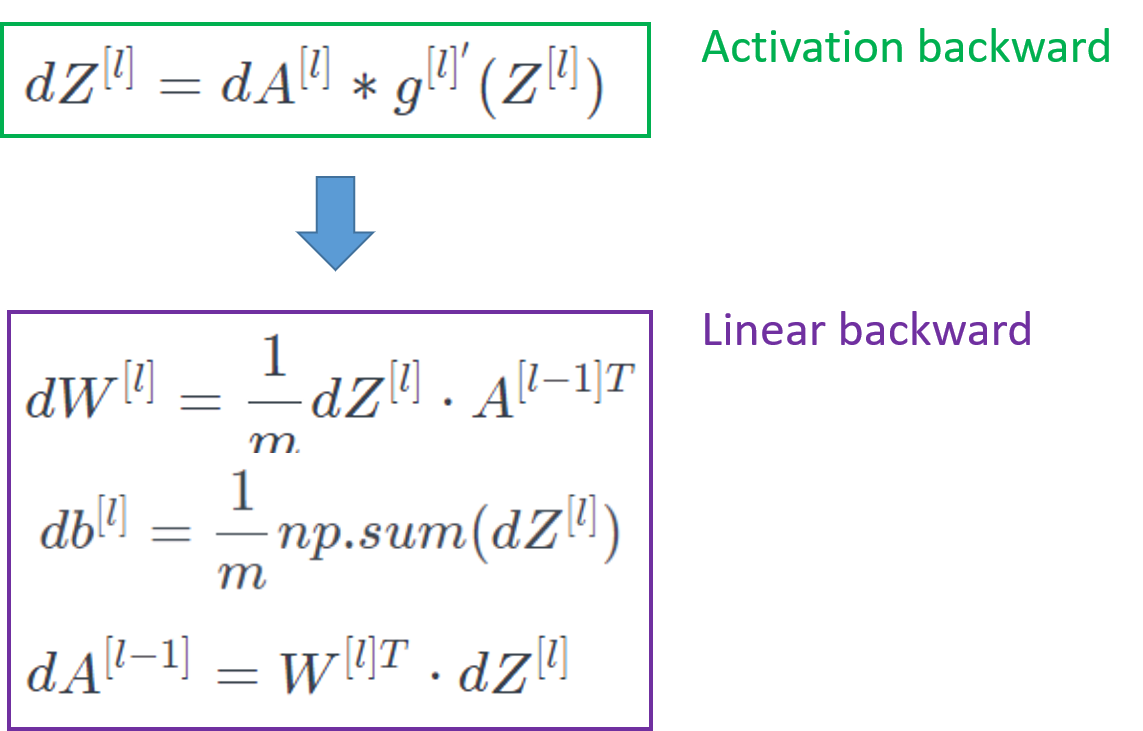



### 6.1 - Activation backward###

Trước tiên ta cần cài đặt hàm activation backward. 
Do có 2 loại activation function (sigmoid và ReLU) nên ta cài đặt 2 hàm relu_backward và sigmoid_backward.

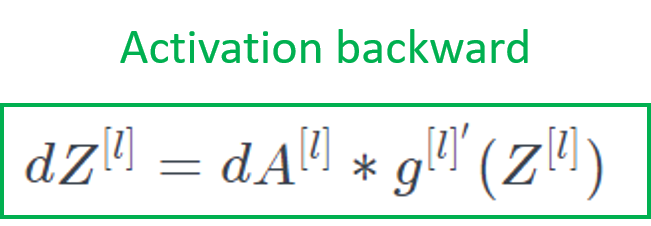

Nhìn hình trên ta có thể thấy input và output của hàm activation backward.

- Input:  dA và Z (Z được lưu trong activation_cache)

- Output: dZ

Các bạn cũng không cần phải cài đặt hàm này, nhưng hãy nhìn công thức hình dưới và code và chắc chắn hiểu rõ về cách cài đặt nhé.

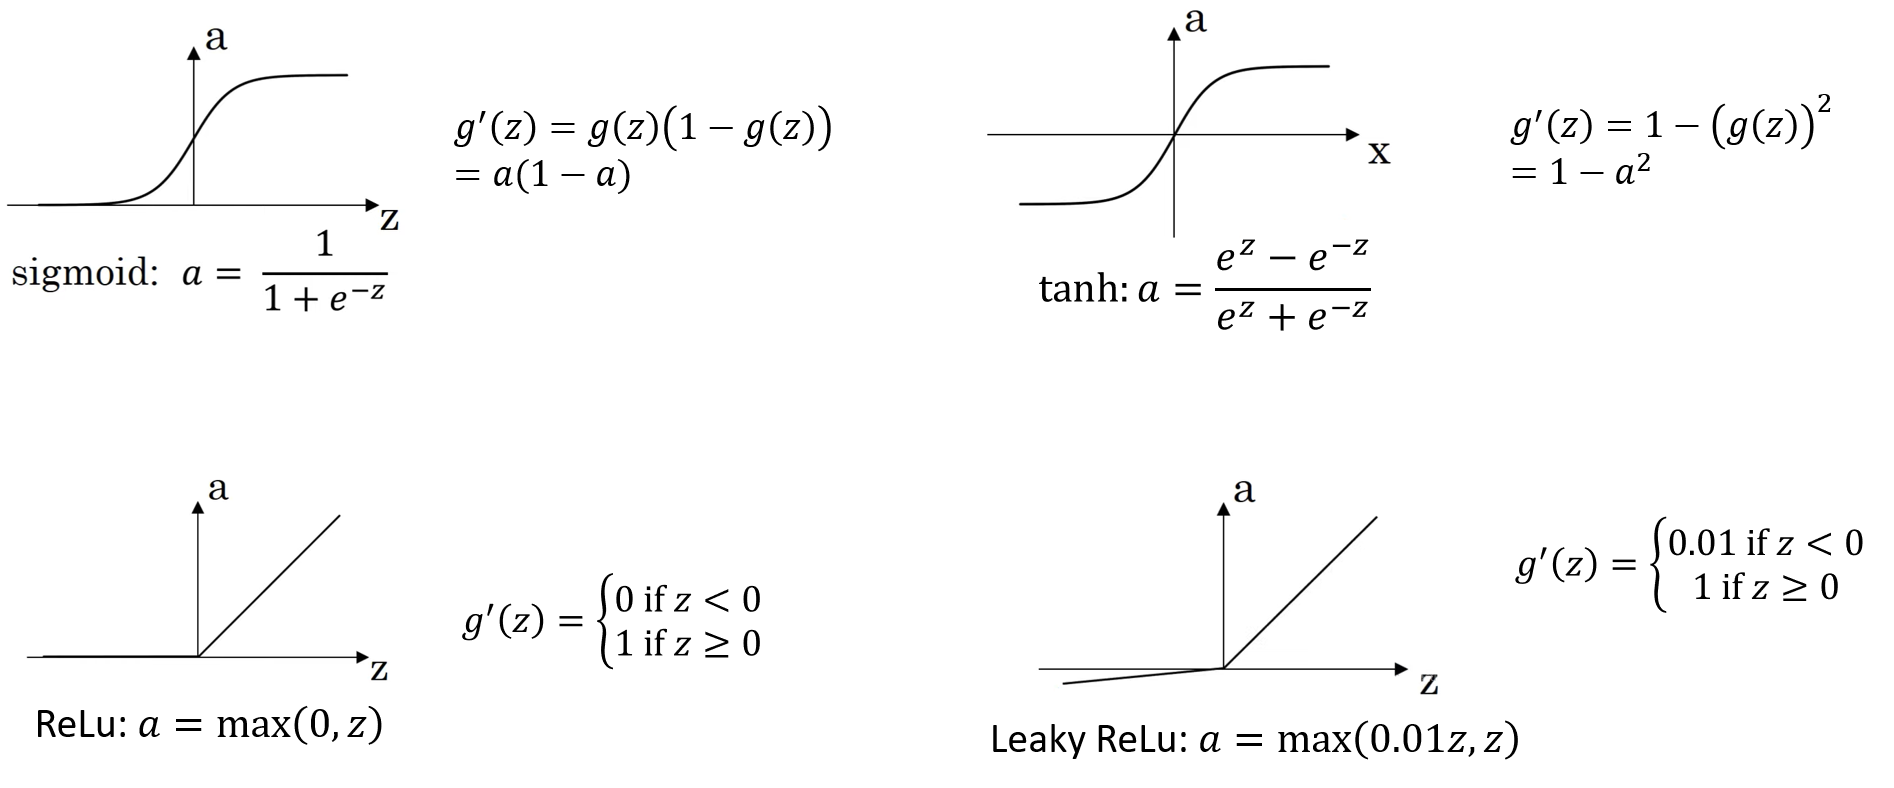

Dưới đây là code cho hai hàm relu_backward và sigmoid_backward.

In [ ]:
def relu_backward(dA, activation_cache):

    Z = activation_cache
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.
 
    dZ[Z <= 0] = 0

    assert (dZ.shape == Z.shape)

    return dZ

def sigmoid_backward(dA, activation_cache):

    Z = activation_cache

    A = 1/(1+np.exp(-Z))
    dZ = dA * A * (1-A)

    assert (dZ.shape == Z.shape)

    return dZ

### 6.2 - Linear backward

Sau khi có dZ, ta có thể tính dW, db, và dA_prev.

Bài tập 4:

Cài đặt hàm linear_backward().

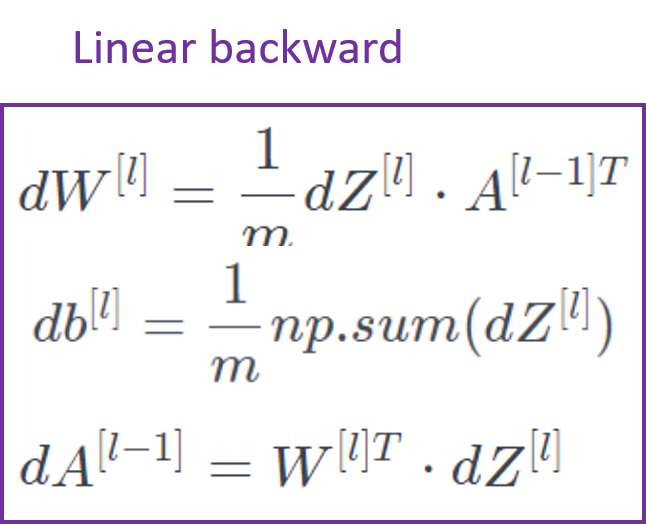

Nhìn hình trên ta có thể thấy input và oupt của hàm linear backward:

- Input:  dZ, W, A_pre
- Output: dA_pre

Nhớ là W và A_pre được lưu trong linear_cache khi tính linear_forward tại layer hiện tại.

In [ ]:
# GRADED FUNCTION: linear_backward

def linear_backward(dZ, linear_cache):
    """
    Cài đặt bước backward propagation tại layer l

    Arguments:
    dZ -- gradient của linear output (của layer hiện tại l)
    linear_cache -- chứa giá trị (A_prev, W, b) 

    Returns:
    dA_prev -- gradient của activation (của layer trước đó l-1), cùng kích thước với A_prev
    dW -- gradient của W (của layer hiện tại l), cùng kích thước với W
    db -- gradient của b (của layer hiện tại l), cùng kích thước với b
    """
    A_prev, W, b = linear_cache
    m = A_prev.shape[1]

    ### START CODE HERE ### (≈ 3 lines of code)
    dW = 
    db =  1/m*(np.sum(dZ,axis=1, keepdims=True))
    dA_prev = np.dot(W.T,dZ)
    ### END CODE HERE ###
    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db

In [ ]:
# Set up some test inputs
dZ, linear_cache = linear_backward_test_case()

dA_prev, dW, db = linear_backward(dZ, linear_cache)
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db))

dA_prev = [[ 0.51822968 -0.19517421]
 [-0.40506361  0.15255393]
 [ 2.37496825 -0.89445391]]
dW = [[-0.10076895  1.40685096  1.64992505]]
db = [[0.50629448]]


**Expected Output**: 

<table style="width:90%">
  <tr>
    <td> **dA_prev** </td>
    <td > [[ 0.51822968 -0.19517421]
          [-0.40506361  0.15255393]
          [ 2.37496825 -0.89445391]]
    </td> 
  </tr> 
  
  <tr>
    <td> **dW** </td>
    <td > [[-0.10076895  1.40685096  1.64992505]] </td> 
  </tr> 
  
  <tr>
    <td> **db** </td>
    <td> [[ 0.50629448]] </td> 
  </tr> 
    
</table>



### 6.2 - Linear-Activation backward

Sau khi có hai hàm activation_backward và linear_backward, ta có thể dùng chúng để cài đặt hàm linear_activation_backward

Bài tập 5: cài đặt hàm linear_activation_backward

In [ ]:
# FUNCTION: linear_activation_backward

def linear_activation_backward(dA, cache, activation):
    """
    Cài đặt backward propagation cho layer hiện tại l
    
    Arguments:
    dA -- gradient của activation A của layer hiện tại l 
    cache -- chứa linear_cache và activation_cache
    activation -- loại activation dùng ở layer hiện tại, là chuỗi có giá trị "sigmoid" or "relu"
    
    Returns:
    dA_prev -- gradient của activation A_pre của layer trước đó l-1, có cùng kích thước với A_prev
    dW -- gradient của W của layer hiện tại
    db -- gradient của b của layer hiện tại
    """
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        ### START CODE HERE ### (≈ 2 lines of code)
        dZ = 
        ### END CODE HERE ###
        
    elif activation == "sigmoid":

        dZ = sigmoid_backward(dA,activation_cache)

    dA_prev, dW, db = linear_backward(dZ,linear_cache)
    return dA_prev, dW, db

In [ ]:
AL, linear_activation_cache = linear_activation_backward_test_case()

dA_prev, dW, db = linear_activation_backward(AL, linear_activation_cache, activation = "sigmoid")
print ("sigmoid:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db) + "\n")

dA_prev, dW, db = linear_activation_backward(AL, linear_activation_cache, activation = "relu")
print ("relu:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db))

sigmoid:
dA_prev = [[ 0.11017994  0.01105339]
 [ 0.09466817  0.00949723]
 [-0.05743092 -0.00576154]]
dW = [[ 0.10266786  0.09778551 -0.01968084]]
db = [[-0.05729622]]

relu:
dA_prev = [[ 0.44090989 -0.        ]
 [ 0.37883606 -0.        ]
 [-0.2298228   0.        ]]
dW = [[ 0.44513824  0.37371418 -0.10478989]]
db = [[-0.20837892]]


**Expect output:**

sigmoid:
dA_prev = [[ 0.11017994 0.01105339]

           [ 0.09466817 0.00949723]
           
           [-0.05743092 -0.00576154]]

dW = [[ 0.10266786 0.09778551 -0.01968084]]

db = [[-0.05729622]]


relu:
dA_prev = [[ 0.44090989 0. ]

           [ 0.37883606 0. ]
           
           [-0.2298228 0. ]]

dW = [[ 0.44513824 0.37371418 -0.10478989]]

db = [[-0.20837892]]

### 6.3 - L_layer Backward 

Bài tập 6:

Dùng hàm linear_activation_backward để cài đặt hàm L_layer_backward để tính gradient của các tham số W và b trên L layer.

Lưu ý đầu vào của backward propagation là dAL. Với hàm cross-entropy cost, dAL được tính như sau:
```python
dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL)) # derivative of cost with respect to AL
```

Sau đó với layer L, ta tính gradient với loại activation function  là "sigmoid".
Với layer từ L-1 đến 1, ta tính gradient với loại activation function là "relu".

Lưu ý: Ta cần lưu các giá trị gradient dW và db tại tất cả layer l vào một từ điển "grads":

$$grads["dW" + str(l)] = dW^{[l]}\tag{15} $$

Ví dụ, với $l=3$ ta sẽ lưu $dW^{[3]}$ dưới dạng `grads["dW3"]`.


In [ ]:
# GRADED FUNCTION: L_model_backward

def L_layer_backward(AL, Y, caches):
    """
    Backward propagation cho L layer
    
    Arguments:
    AL -- output của forward propagation
    Y -- nhãn đúng (0 if non-cat, 1 if cat)
    caches -- chứa linear_cache và activation_cache
    
    Returns:
    grads -- từ điển dùng để chứa gradient dW, db tại mỗi layer l
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ... 
    """
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    # Tính dAL để khởi đầu backpropagation
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))

    
    # Tính gradient dWL,dbL,dA_prev tại layer L

    current_cache = caches[L-1]
    dA_prev, grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL,current_cache,"sigmoid")

    
    # Tính gradient dWl,dbl,dA_prev tại layer l
    for l in reversed(range(L-1)):
        ### START CODE HERE ### (approx. 5 lines)
        current_cache = caches[l]
        dA_prev, dW_temp, db_temp = 
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp
        ### END CODE HERE ###

    return grads

In [ ]:
AL, Y_assess, caches = L_model_backward_test_case()
grads = L_layer_backward(AL, Y_assess, caches)
print_grads(grads)

dW1 = [[0.41010002 0.07807203 0.13798444 0.10502167]
 [0.         0.         0.         0.        ]
 [0.05283652 0.01005865 0.01777766 0.0135308 ]]
db1 = [[-0.22007063]
 [ 0.        ]
 [-0.02835349]]


**Expected Output**

dW1 = [[ 0.41010002 0.07807203 0.13798444 0.10502167]

       [ 0. 0. 0. 0. ]
       
       [ 0.05283652 0.01005865 0.01777766 0.0135308 ]]
db1 = [[-0.22007063]

       [ 0. ]
       
       [-0.02835349]]

### 6.4 - Update Parameters

Update sử dụng gradient descent: 

$$ W^{[l]} = W^{[l]} - \alpha \text{ } dW^{[l]} \tag{16}$$
$$ b^{[l]} = b^{[l]} - \alpha \text{ } db^{[l]} \tag{17}$$

trong đó $\alpha$ là learning rate. 

Các bạn không phải cài đặt hàm này, nhưng hãy chắc chắn hiểu code nhé.

In [ ]:
# FUNCTION: update_parameters

def update_parameters(parameters, grads, learning_rate):
    
    L = len(parameters) //2 # number of layers in the neural network
    for i in range(1,L+1):
        parameters["W" + str(i)] = parameters["W" + str(i)] - learning_rate*grads["dW"+str(i)]
        parameters["b" + str(i)] = parameters["b" + str(i)] - learning_rate*grads["db"+str(i)]
        
    return parameters

In [ ]:
parameters, grads = update_parameters_test_case()
parameters = update_parameters(parameters, grads, 0.1)

print ("W1 = "+ str(parameters["W1"]))
print ("b1 = "+ str(parameters["b1"]))
print ("W2 = "+ str(parameters["W2"]))
print ("b2 = "+ str(parameters["b2"]))

W1 = [[-0.59562069 -0.09991781 -2.14584584  1.82662008]
 [-1.76569676 -0.80627147  0.51115557 -1.18258802]
 [-1.0535704  -0.86128581  0.68284052  2.20374577]]
b1 = [[-0.04659241]
 [-1.28888275]
 [ 0.53405496]]
W2 = [[-0.55569196  0.0354055   1.32964895]]
b2 = [[-0.84610769]]


**Expected Output**:

W1 = [[-0.59562069 -0.09991781 -2.14584584 1.82662008]

      [-1.76569676 -0.80627147 0.51115557 -1.18258802]
      
      [-1.0535704 -0.86128581 0.68284052 2.20374577]]

b1 = [[-0.04659241]

      [-1.28888275]
      
      [ 0.53405496]]

W2 = [[-0.55569196 0.0354055 1.32964895]]

b2 = [[-0.84610769]]

## 7- Kết hợp tất cả thành phần để tạo mô hình

Bài tập 7:

Vậy là ta đã có tất cả thành phần cần thiết của mô hình. Giờ là lúc kết hợp chúng để cài đặt một mô hình Neural Network L lớp.

In [ ]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.01, num_iterations = 3000, print_cost=False):#lr was 0.009
    """
    Implements a L-layer neural network: 

    Arguments:
    X -- dữ liệu đầu vào (number of examples, num_px * num_px * 3)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps

    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []                         # keep track of cost

    # Parameters initialization. (≈ 1 line of code)
    ### START CODE HERE ###
    parameters = initialize_parameters_deep(layers_dims)
    ### END CODE HERE ###

    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation:

        AL, caches = 


        # Compute cost.
        ### START CODE HERE ### (≈ 1 line of code)
        cost = 
        ### END CODE HERE ###

        # Backward propagation.

        grads = L_layer_backward(AL, Y, caches)


        # Update parameters.
        ### START CODE HERE ### (≈ 1 line of code)
        parameters = 
        ### END CODE HERE ###

        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)

    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

In [ ]:
def load_dataset():
    train_dataset = h5py.File('train_catvnoncat.h5', "r")
    train_x_orig = np.array(train_dataset["train_set_x"][:]) # train set features
    train_y_orig = np.array(train_dataset["train_set_y"][:]) # train set labels
    test_dataset = h5py.File('test_catvnoncat.h5', "r")
    test_x_orig = np.array(test_dataset["test_set_x"][:]) # test set features
    test_y_orig = np.array(test_dataset["test_set_y"][:]) # test set labels
    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    train_y_orig = train_y_orig.reshape((1, train_y_orig.shape[0]))
    test_y_orig = test_y_orig.reshape((1, test_y_orig.shape[0]))
    return train_x_orig, train_y_orig, test_x_orig, test_y_orig, classes

train_x_orig, train_y, test_x_orig, test_y, classes = load_dataset()


# Reshape the training and test examples
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T


# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.


## 8 - Chạy thử mô hình 🥳🥳🥳

Hãy chạy thử mô hình xem kết quả thế nào nhé. Chúng ta sẽ tạo một mô hình với 4 layer với kích thước các lớp là 12288, 20, 7, 5, 1. Hãy xem mô hình học với bộ dữ liệu ảnh mèo thế nào nhé (việc mô hình học được hay không thể hiện qua việc cost có giảm qua các lần lặp hay không).


Cost after iteration 0: 0.693148
Cost after iteration 100: 0.674096
Cost after iteration 200: 0.662521
Cost after iteration 300: 0.655453
Cost after iteration 400: 0.651112
Cost after iteration 500: 0.648432
Cost after iteration 600: 0.646767
Cost after iteration 700: 0.645729
Cost after iteration 800: 0.645080
Cost after iteration 900: 0.644672
Cost after iteration 1000: 0.644415
Cost after iteration 1100: 0.644253
Cost after iteration 1200: 0.644151
Cost after iteration 1300: 0.644086
Cost after iteration 1400: 0.644045
Cost after iteration 1500: 0.644019
Cost after iteration 1600: 0.644002
Cost after iteration 1700: 0.643992
Cost after iteration 1800: 0.643985
Cost after iteration 1900: 0.643981
Cost after iteration 2000: 0.643978
Cost after iteration 2100: 0.643977
Cost after iteration 2200: 0.643976
Cost after iteration 2300: 0.643975
Cost after iteration 2400: 0.643975


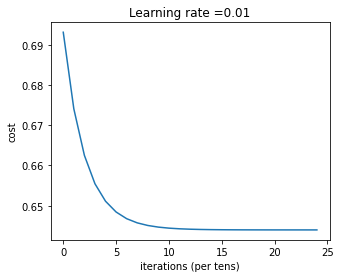

In [ ]:
layers_dims = [12288, 20, 7, 5, 1] # 4-layer model
parameters = L_layer_model(train_x, train_y, layers_dims, num_iterations = 2500, print_cost = True)


Có vẻ mô hình đang gặp vấn đề, ta thấy cost không giảm mấy sau các lần lặp. 🤦🤦🤦
Nhưng hãy cố thử xem độ chính xác trên tập train và tập test là bao nhiêu nhé.
Đầu tiên ta cần cài đặt hàm predict. Hàm này đơn giản sẽ dùng tham số sau khi học và dùng hàm L_layer_forward để tính output của network. Output này chính là xác xuất ảnh là mèo hay không phải mèo. Sau đó xác suất này sẽ được chuyển thành dự đoán 0 hoặc 1.


In [ ]:
def predict(X, y, parameters):
    """
    This function is used to predict the results of a  L-layer neural network.

    Arguments:
    X -- data set of examples you would like to label
    parameters -- parameters of the trained model

    Returns:
    p -- predictions for the given dataset X
    """
    m = X.shape[1]
    n = len(parameters) // 2 # number of layers in the neural network
    p = np.zeros((1,m))

    # Forward propagation
    probas, caches = L_layer_forward(X, parameters)


    # convert probas to 0/1 predictions
    for i in range(0, probas.shape[1]):
        if probas[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0

    #print results
    #print ("predictions: " + str(p))
    #print ("true labels: " + str(y))
    print("Accuracy: "  + str(np.sum((p == y)/m)))

    return p

Xem thử độ chính xác trên tập train và tập test.

In [ ]:
pred_train = predict(train_x, train_y, parameters)
pred_test = predict(test_x, test_y, parameters)

Accuracy: 0.6555023923444976
Accuracy: 0.3400000000000001



## 9 - Conclusion

Như vậy sau bao công sức bỏ ra thì ta đã thu được một mô hình có thể dự đoán được bộ ảnh mèo với độ chính xác 34%, tức là còn thua tung đồng xu để dự đoán (xs 50%) 😹😹😹.

Các bạn chờ bài tiếp theo để biết được nguyên nhân của chuyện này và cách khắc phục rất đơn giản nhé 😸😸.